In [1]:
using OITOOLS

┌ Info: Precompiling OITOOLS [58da1ff6-845a-519d-b3ee-ddbcc77dda80]
└ @ Base loading.jl:1260
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Pkg/src/Pkg.jl:531


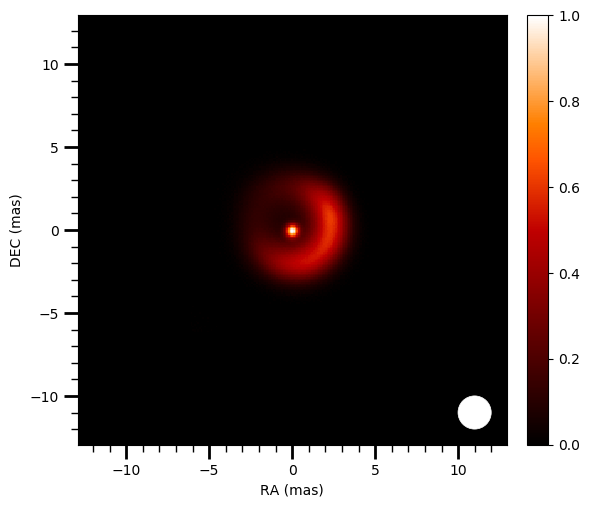

In [2]:
fitsfile = "./data/2004true.fits";
pixsize = 0.101; # in mas/pixel
x_true = readfits(fitsfile); nx = (size(x_true))[1]; x_true=vec(x_true);

# display the image
imdisp(x_true, pixscale = pixsize, tickinterval = 1.0, beamsize = 1.0, beamlocation = [0.85, 0.85], use_colorbar = true)

In [3]:
oifitsfile = "./data/2004-data1.oifits";
data = (readoifits(oifitsfile))[1,1]; # data can be split by wavelength, time, etc.

┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


In [4]:
data.nuv, data.nv2, data.nt3amp, data.nt3phi

(247, 195, 130, 130)

In [5]:
data.uv

2×247 Array{Float64,2}:
      -1.13996e7  -1.1696e7   …   2.1535e7    2.23659e7   2.2812e7
 -831762.0        -2.07369e6     -2.25956e7  -2.02349e7  -1.78056e7

In [6]:
data.v2

195-element Array{Float64,1}:
  0.7173843383789062
  0.6997612118721008
  0.6874377131462097
  0.6793773770332336
  0.6661666035652161
  0.6605017185211182
  0.6575695872306824
  0.6490134000778198
  0.6483098864555359
  0.6418826580047607
  0.6368133425712585
  0.6322910189628601
  0.6242653131484985
  ⋮
  0.0005338648916222155
  0.0008845569682307541
  0.00013056832540314645
  0.0004299974534660578
  0.000293102755676955
  0.000656169664580375
  0.00012252644228283316
  0.0009803363354876637
  0.0003563631616998464
  0.0005742112407460809
 -6.327339360723272e-5
  0.0004951238515786827

In [7]:
data.v2_err

195-element Array{Float64,1}:
 0.0024589060340076685
 0.0024117224384099245
 0.0023986389860510826
 0.0024070627987384796
 0.0023581262212246656
 0.002409725682809949
 0.002344886539503932
 0.0023144858423620462
 0.002360293408855796
 0.002351831877604127
 0.0023314813151955605
 0.0022951627615839243
 0.002311798045411706
 ⋮
 0.0003041979216504842
 0.00031144439708441496
 0.00029241933953016996
 0.0003012586385011673
 0.0002997801057063043
 0.00029902931419201195
 0.00029293709667399526
 0.0003094328276347369
 0.00029870501020923257
 0.0003005625039804727
 0.00029034417821094394
 0.00030232235440053046

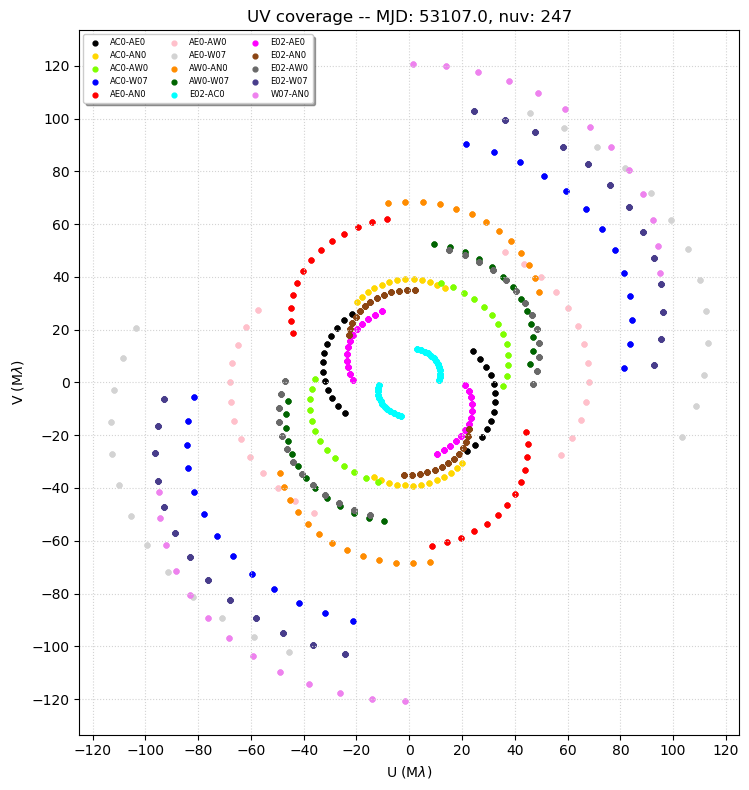

In [8]:
uvplot(data)

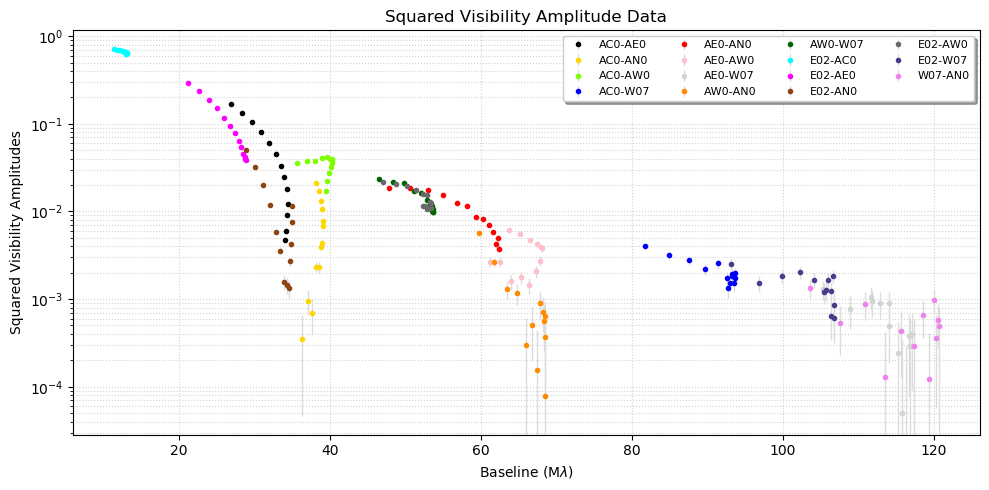

In [9]:
v2plot(data,logplot=true);

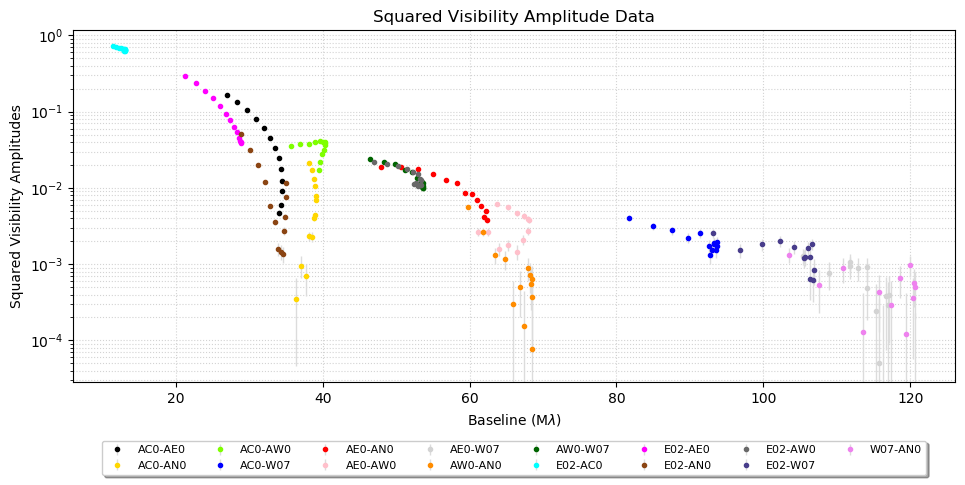

In [10]:
v2plot(data,logplot=true, legend_below=true);

In [11]:
dft = setup_dft(data, nx, pixsize);
chi2 = chi2_dft_f(x_true, dft, data);
cvis_model = image_to_cvis_dft(x_true, dft);
v2_model = cvis_to_v2(cvis_model, data.indx_v2);

Chi2r: 1.6842607705696082 V2: 2.5148441245352244 T3A: 1.2029413925676045 T3P: 0.9197051176231875 Flux: 1.0


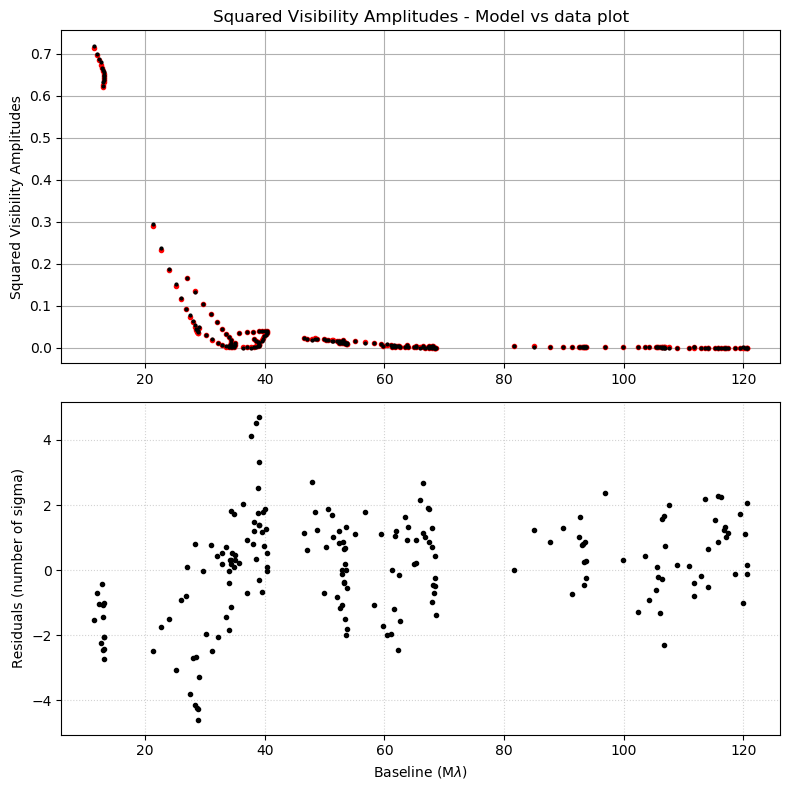

In [12]:
v2plot_modelvsdata(data, v2_model);

In [13]:
filename = "./data/HD140573.oifits"; #NPOI oifits can have multiple targets per file
targetname =  "FKV0582";
data = (readoifits(filename, targetname=targetname, filter_bad_data = true, filter_v2_snr_threshold=1.0))[1,1];


┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


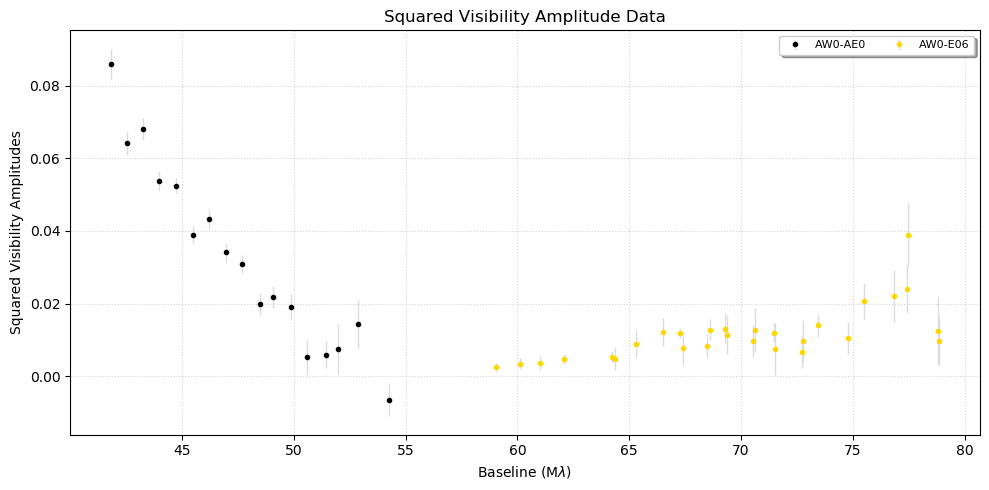

In [14]:
v2plot(data)

In [15]:
f_chi2, params, cvis_model = fit_model_v2(data, visibility_ud, [1.0]);# diameter is the parameter

Chi2: 1.599178038588461 	 parameters:[4.410408020019531] 	 	 XTOL_REACHED


In [16]:
v2_model = cvis_to_v2(cvis_model, data.indx_v2)

45-element Array{Float64,1}:
 0.000726805758911097
 0.002507539340333388
 0.010947524126705962
 0.013395279178317615
 0.015477538312164035
 0.016772088753532265
 0.017422151843369905
 0.017421075825520327
 0.001589090142524001
 0.0038130705189544055
 0.006674243628227972
 0.012466003205609309
 0.01467031926501011
 ⋮
 0.018093290562881798
 0.011232472595205394
 0.006483169356995696
 0.07447452857444399
 0.05812923659013294
 0.04332950444711233
 0.031218646773326073
 0.021473141832462586
 0.014107485785435183
 0.008199239685962895
 0.0042841929416485664
 0.001740627715789198

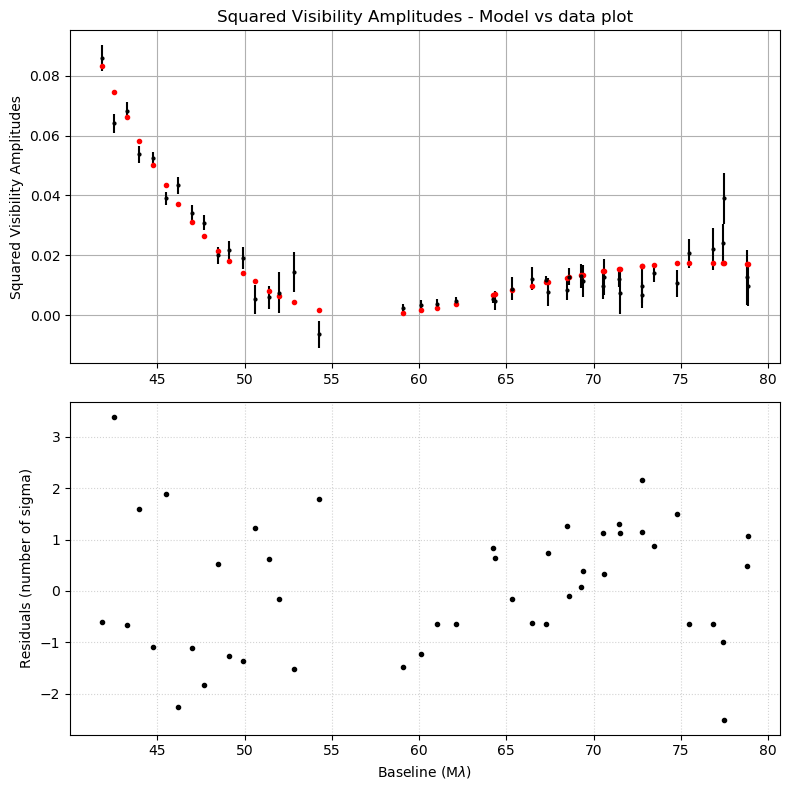

In [17]:
v2plot_modelvsdata(data, v2_model);

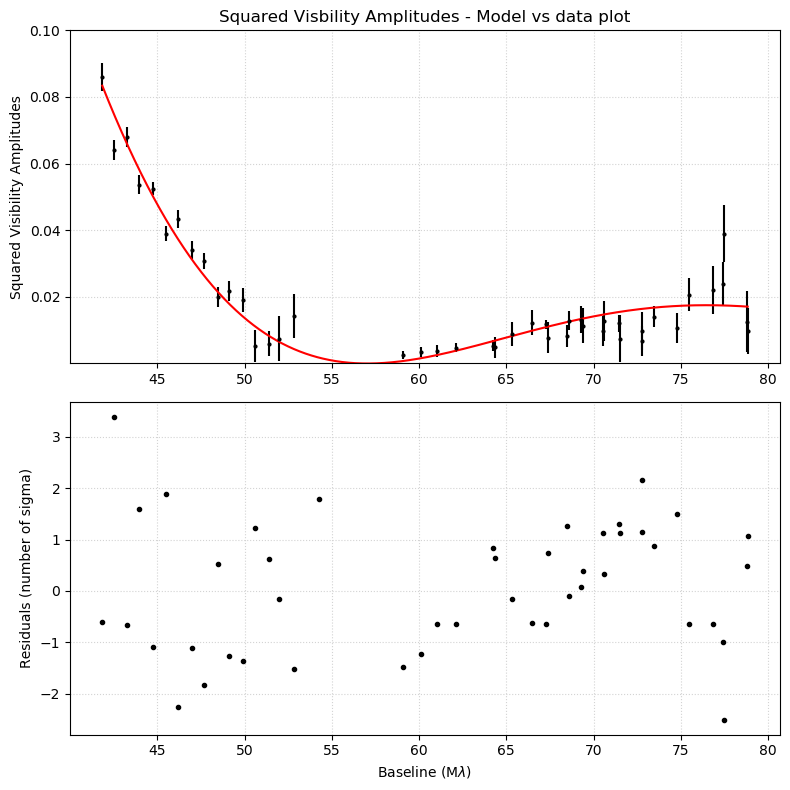

In [18]:
v2plot_modelvsfunc(data, visibility_ud,params , yrange=[1e-4, .1]);

In [19]:
oifitsfile = "./data/AlphaCenA.oifits";
data = (readoifits(oifitsfile))[1,1];

┌ Warning: V2 table 2 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 2 refers to station index 5, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 3 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 3 refers to station index 7, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 4 refers to station index 6, non existent in OI_ARRAY=VLTI; available indexes are [1, 2, 3, 4]
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:234
┌ Warning: V2 table 4 refers to station index 5, non existent in OI_ARRAY=VLTI; available index

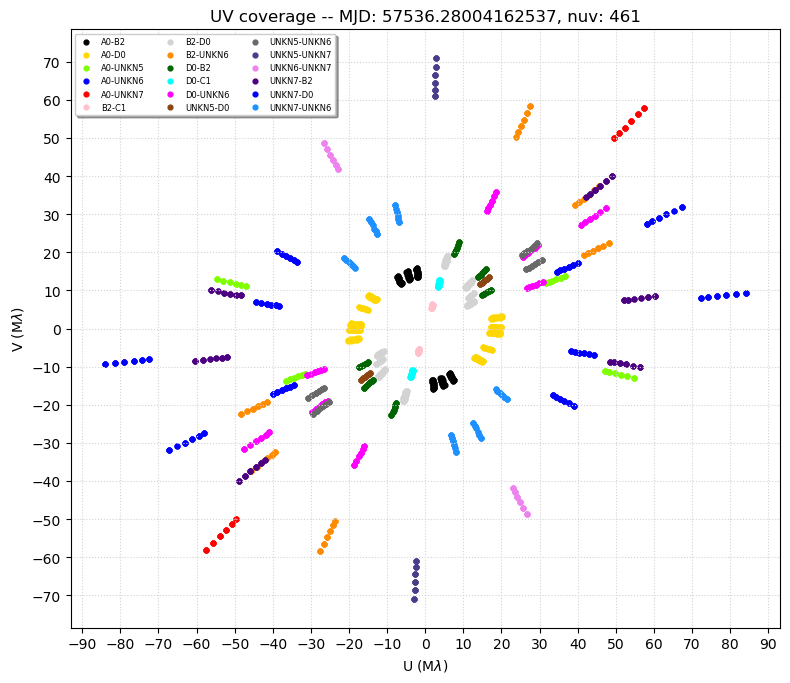

In [20]:
uvplot(data)

Finding mode...
Chi2: 15.23373708255482 	 parameters:[8.306655883789062] 	 	 XTOL_REACHED
Now boostraping to estimate errors...
Boostrap 10 out of 1000
Boostrap 20 out of 1000
Boostrap 30 out of 1000
Boostrap 40 out of 1000
Boostrap 50 out of 1000
Boostrap 60 out of 1000
Boostrap 70 out of 1000
Boostrap 80 out of 1000
Boostrap 90 out of 1000
Boostrap 100 out of 1000
Boostrap 110 out of 1000
Boostrap 120 out of 1000
Boostrap 130 out of 1000
Boostrap 140 out of 1000
Boostrap 150 out of 1000
Boostrap 160 out of 1000
Boostrap 170 out of 1000
Boostrap 180 out of 1000
Boostrap 190 out of 1000
Boostrap 200 out of 1000
Boostrap 210 out of 1000
Boostrap 220 out of 1000
Boostrap 230 out of 1000
Boostrap 240 out of 1000
Boostrap 250 out of 1000
Boostrap 260 out of 1000
Boostrap 270 out of 1000
Boostrap 280 out of 1000
Boostrap 290 out of 1000
Boostrap 300 out of 1000
Boostrap 310 out of 1000
Boostrap 320 out of 1000
Boostrap 330 out of 1000
Boostrap 340 out of 1000
Boostrap 350 out of 1000
Boostr

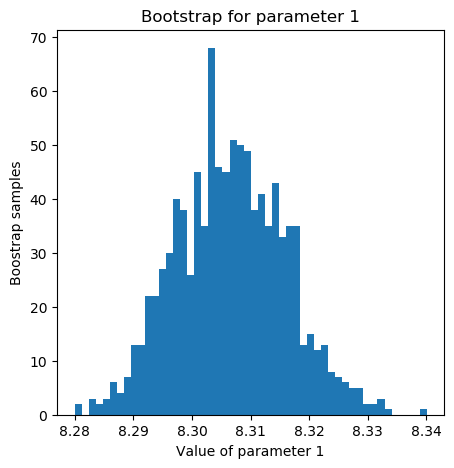

Boostrap mean: [8.306578883461771]
Bootstrap standard deviation: [0.009386490702190145]


In [21]:
params_mode, params_mean, params_err = bootstrap_v2_fit(1000, data, visibility_ud, [8.0]);

In [22]:
oifitsfile = "./data/2004-data1.oifits"
pixsize = 0.2 # milliarcseconds/pixel
nx = 64
data = readoifits(oifitsfile)[1,1];

┌ Warning: This file does not follow the oifits standard - station indexing should start at 1, not zero
└ @ OITOOLS /home/baron/SOFTWARE/OITOOLS.jl/src/readoifits.jl:211


In [23]:
ft = setup_nfft(data, nx, pixsize);
#initial image is a simple Gaussian
x_start = gaussian2d(nx,nx,nx/6);
x_start = vec(x_start)/sum(x_start);
regularizers = [["centering", 1e3], ["tv", 7e3]];

In [24]:
x = reconstruct(x_start, data, ft, regularizers = regularizers, verb = true);

V2: 1091.2836551813396 T3A: 582.9567176901525 T3P: 600.7968755027684  Flux: 1.0  COG:[32.013331797791565 32.013331797791565] REGC: 0.4736918780815799 TV:0.13136358282340171
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    3.6808151683328627E+05  5.34E+10  0.00E+00
V2: 34550.69306938302 T3A: 1324.8094716997173 T3P: 808.3081989071069  Flux: 28.92707484758804  COG:[32.83751552732697 33.67345077996274] REGC: 1.4909034641819716 TV:20.409034009406536
V2: 34326.67746729385 T3A: 1346.4397570337915 T3P: 834.7961323369514  Flux: 14.719877331065874  COG:[32.82338832535512 33.643956534323685] REGC: 1.4132165613978442 TV:10.314398549560822
V2: 33803.226393725825 T3A: 1392.3144724579838 T3P: 917.986943179573  Flux: 7.622539062562132  COG:[32.79532565240242 33.58710428691983] REGC: 1.2690129716063905 TV:5.267585471530165
V2: 32340.5712561455 T3A: 1489.9212994364184 T3P: 1148.0468056996938  Flux:

V2: 5.4110266430538445 T3A: 1.549616472980241 T3P: 8.72038424974538  Flux: 0.8886868080319392  COG:[31.773470464770224 32.73992094119211] REGC: 0.5854072235837029 TV:0.20719548775026267
    30     48      0    4.4260259271853720E+03  1.40E+06  1.00E+00
V2: 5.14490959318868 T3A: 1.54603757020405 T3P: 8.39855038545722  Flux: 0.8903373766460984  COG:[31.836029496428406 32.68927792987178] REGC: 0.4766829643496622 TV:0.20832616493498518
    31     49      0    4.2310199238023160E+03  2.11E+06  1.00E+00
V2: 4.629554441936335 T3A: 1.4092513520278538 T3P: 7.959847428918131  Flux: 0.890402565332549  COG:[31.85355405575996 32.62578305484144] REGC: 0.4337137357096407 TV:0.2089295378956159
    32     50      0    4.0169664586795157E+03  1.71E+06  1.00E+00
V2: 4.1087317684445885 T3A: 1.3958076048895003 T3P: 7.194632600965089  Flux: 0.8925236220648187  COG:[31.89539498375566 32.528453812184665] REGC: 0.36635684509565714 TV:0.2115743539054491
    33     51      0    3.7653372440415924E+03  1.84E+06  

    63     96      0    2.2307086816821625E+03  4.14E+05  1.50E-01
V2: 1.89444186210718 T3A: 0.9855370995066938 T3P: 1.2984734313072757  Flux: 0.9291583468958228  COG:[32.244654607498255 32.31874253190123] REGC: 0.09805553921344717 TV:0.2250815107720449
V2: 1.629763270329669 T3A: 0.8097227369421762 T3P: 1.3600392444315157  Flux: 0.9247983968136286  COG:[32.20850488069143 32.32777716797529] REGC: 0.11463010845132912 TV:0.2175540947488862
V2: 1.625425618633694 T3A: 0.7991372983184942 T3P: 1.3769219671090307  Flux: 0.9240984901591173  COG:[32.204383432899476 32.33301383383481] REGC: 0.11527353443484621 TV:0.21664547024766087
V2: 1.6256521104484014 T3A: 0.7960891270327503 T3P: 1.3841382303626328  Flux: 0.9238377336984234  COG:[32.20294457908626 32.335262378788464] REGC: 0.11538040693667674 TV:0.21642528589162696
V2: 1.6262006833194214 T3A: 0.7949092030528382 T3P: 1.387383828159728  Flux: 0.9237223617486432  COG:[32.20229936717019 32.33634626977138] REGC: 0.11540821020500966 TV:0.2163501579

V2: 1.6117092767419163 T3A: 0.7951562445478263 T3P: 1.3598608173460793  Flux: 0.924269310009814  COG:[32.203836422095186 32.32791108876894] REGC: 0.11732745824607138 TV:0.21678507926117022
V2: 1.6117092767420649 T3A: 0.7951562445477924 T3P: 1.3598608173467568  Flux: 0.9242693100097774  COG:[32.20383642209503 32.32791108876921] REGC: 0.11732745824607105 TV:0.21678507926115026
    66    140      0    2.2292585400851167E+03  3.43E+05  5.81E-12
# CONVERGENCE: X test satisfied


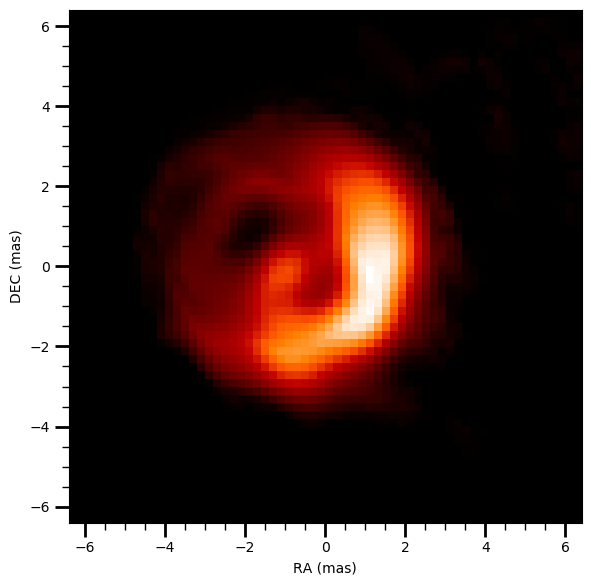

In [25]:
imdisp(x,pixscale=pixsize)

In [26]:
x=deepcopy(x_start)
for i=1:10 
 global x = reconstruct(x, data, ft, regularizers = regularizers, verb = true);
end

V2: 1091.2836551813396 T3A: 582.9567176901525 T3P: 600.7968755027684  Flux: 1.0  COG:[32.013331797791565 32.013331797791565] REGC: 0.4736918780815799 TV:0.13136358282340171
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    3.6808151683328627E+05  5.34E+10  0.00E+00
V2: 34550.69306938302 T3A: 1324.8094716997173 T3P: 808.3081989071069  Flux: 28.92707484758804  COG:[32.83751552732697 33.67345077996274] REGC: 1.4909034641819716 TV:20.409034009406536
V2: 34326.67746729385 T3A: 1346.4397570337915 T3P: 834.7961323369514  Flux: 14.719877331065874  COG:[32.82338832535512 33.643956534323685] REGC: 1.4132165613978442 TV:10.314398549560822
V2: 33803.226393725825 T3A: 1392.3144724579838 T3P: 917.986943179573  Flux: 7.622539062562132  COG:[32.79532565240242 33.58710428691983] REGC: 1.2690129716063905 TV:5.267585471530165
V2: 32340.5712561455 T3A: 1489.9212994364184 T3P: 1148.0468056996938  Flux:

V2: 19.697907346143776 T3A: 8.476271910371542 T3P: 26.555503356722465  Flux: 0.8858462205487826  COG:[31.50192267175868 32.61332913557728] REGC: 1.0090018461200232 TV:0.19276423553944264
    18     36      0    1.0753574212116378E+04  4.24E+06  1.00E+00
V2: 15.836254860127623 T3A: 6.879952864561104 T3P: 22.076284420769184  Flux: 0.8847370120807854  COG:[31.51135830940092 32.695318690498766] REGC: 1.0155617832487625 TV:0.19411251429376525
    19     37      0    9.2267299281229443E+03  3.54E+06  1.00E+00
V2: 11.354474347619524 T3A: 5.25859813586173 T3P: 18.18643371645132  Flux: 0.879792690172018  COG:[31.470581258732096 32.74323646025446] REGC: 1.1188669204707138 TV:0.19497465335169928
    20     38      0    7.7456661325191126E+03  4.11E+06  1.00E+00
V2: 11.465067598956548 T3A: 5.182709761702765 T3P: 14.489910805618619  Flux: 0.8858552731945296  COG:[31.50261293205863 32.854406381400786] REGC: 1.120384846474285 TV:0.1992304229657731
    21     39      0    7.3081266627830037E+03  5.15E

V2: 1.7437819193416144 T3A: 0.9064216192114041 T3P: 1.3605888288427177  Flux: 0.925274377740767  COG:[32.209249333049726 32.33899969491255] REGC: 0.11045704857028041 TV:0.21906410960818273
V2: 1.6396855431256727 T3A: 0.8356512285876961 T3P: 1.4119026314560559  Flux: 0.9230460802689786  COG:[32.19589557643967 32.35317942955895] REGC: 0.11403578033359754 TV:0.21608137305398195
V2: 1.6297904955615847 T3A: 0.8277457056973357 T3P: 1.4316420734299238  Flux: 0.9225225258594911  COG:[32.193376140540515 32.357744910771395] REGC: 0.1142547016012685 TV:0.21569365525773024
    60     85      0    2.2356398463264331E+03  4.17E+05  1.53E-01
V2: 1.9159053432374094 T3A: 0.8704588126591852 T3P: 1.3692399644883446  Flux: 0.9285074745761228  COG:[32.26746485932337 32.32006996580659] REGC: 0.08644740885434303 TV:0.2248537436940941
V2: 1.6565287151867076 T3A: 0.8150148226383003 T3P: 1.396235465389542  Flux: 0.9241354128461767  COG:[32.2126628155043 32.34230535248828] REGC: 0.10743025944775973 TV:0.21727077

V2: 16896.819080164798 T3A: 5402.547781018671 T3P: 1482.6589528278946  Flux: 25.39458691547799  COG:[35.35793151147187 38.43054474252635] REGC: 43.339133467370814 TV:24.43086550731298
V2: 10755.859967561726 T3A: 3229.485291996662 T3P: 1467.1467977531254  Flux: 3.079156286415803  COG:[34.69391100559163 37.18809991043479] REGC: 26.79152627067473 TV:2.6603285165910946
V2: 682.2376620549576 T3A: 360.0540943783775 T3P: 655.1249789835762  Flux: 1.0911246968471926  COG:[32.89353558840151 33.436190196907546] REGC: 1.0313223441243144 TV:0.4018115643688341
V2: 17.382163971684637 T3A: 12.008733048887475 T3P: 2.203773081039889  Flux: 0.9373459257959723  COG:[32.217314960835864 32.40953870659994] REGC: 0.08809407697084091 TV:0.21261199455615415
V2: 1.705675642161179 T3A: 1.0006461567820717 T3P: 1.2921926373814976  Flux: 0.9254985423330646  COG:[32.20361878254546 32.33553522273263] REGC: 0.11489048902143963 TV:0.21524713017285088
V2: 1.6010410160264943 T3A: 0.8327028959309659 T3P: 1.3366340443311178

V2: 1026.1751131207525 T3A: 519.8603827257247 T3P: 1355.4727838537044  Flux: 1.1335954660673155  COG:[32.48701424789443 33.216351241043625] REGC: 0.5133277303024897 TV:0.3206408074125565
V2: 35.81657293029272 T3A: 24.585114909323828 T3P: 2.8617358522793537  Flux: 0.9437148688295581  COG:[32.18862896713137 32.393668941439124] REGC: 0.10825821412435274 TV:0.20797916481753392
V2: 1.8039039870147788 T3A: 1.2102059394416254 T3P: 1.227482875721269  Flux: 0.9269378806590782  COG:[32.2067301634778 32.341390355055516] REGC: 0.11116421648317285 TV:0.20981093389805539
V2: 1.5547325946724773 T3A: 0.9022441117301714 T3P: 1.3027970887528275  Flux: 0.9255353160672055  COG:[32.209536492750516 32.337573691106] REGC: 0.11075135486459967 TV:0.2104627066555105
     1      7      0    2.1738185134770961E+03  3.55E+05  4.01E-11
V2: 1.544963228940077 T3A: 0.8961620436261363 T3P: 1.2941110178130606  Flux: 0.9254291605641858  COG:[32.207032838341725 32.33541417699596] REGC: 0.11291825094402277 TV:0.21028950091

V2: 1.5589874146705378 T3A: 0.7980019442860868 T3P: 1.2027367841517542  Flux: 0.9256401185421503  COG:[32.19122108361513 32.32007456374391] REGC: 0.12771758181575749 TV:0.20696764915922045
V2: 1.5589918349593734 T3A: 0.7978725167005392 T3P: 1.2027577896552097  Flux: 0.925637149840826  COG:[32.19119989292322 32.32003629576679] REGC: 0.12774444097196727 TV:0.20696428337026004
V2: 1.558994461064386 T3A: 0.7978121018775624 T3P: 1.2027685643430717  Flux: 0.9256357382082755  COG:[32.19119024034016 32.32001795224573] REGC: 0.12775700517498773 TV:0.20696268661477535
V2: 1.5589958624361286 T3A: 0.797782821966308 T3P: 1.202773810303874  Flux: 0.9256350544923149  COG:[32.19118557707185 32.32000904462972] REGC: 0.12776309182355272 TV:0.20696192710982592
V2: 1.5589967049284945 T3A: 0.7977686146093835 T3P: 1.2027763684962702  Flux: 0.925634724140109  COG:[32.19118334999829 32.32000472324717] REGC: 0.12776602297160508 TV:0.2069615616029192
V2: 1.5589971303022576 T3A: 0.7977617116153808 T3P: 1.2027776

V2: 1.5467503190775789 T3A: 0.8896474303978815 T3P: 1.1948608702611012  Flux: 0.9263786873042927  COG:[32.197115172594934 32.32885999388215] REGC: 0.1210281203662151 TV:0.20475875626923093
     3     10      0    2.1269418055566275E+03  5.33E+05  4.04E-01
V2: 1.6372648083297199 T3A: 0.9527114035752584 T3P: 1.2792651776499702  Flux: 0.9265399113399295  COG:[32.20715416935618 32.33677209398321] REGC: 0.11240202982809608 TV:0.20755515090351584
V2: 1.5421113543040377 T3A: 0.8873621702714355 T3P: 1.215866274701756  Flux: 0.9263342482618044  COG:[32.19873311145094 32.32936455693669] REGC: 0.11987819256544328 TV:0.20476615727387829
V2: 1.5415112920779113 T3A: 0.8864272293047397 T3P: 1.2048006637416488  Flux: 0.9263504985482701  COG:[32.197823506721576 32.3290329200236] REGC: 0.12054037552570192 TV:0.20465984348948718
     4     13      0    2.1256136080033352E+03  4.53E+05  1.39E-01
V2: 1.5301672111759317 T3A: 0.9153505558405104 T3P: 1.2149498448922973  Flux: 0.9262562285014249  COG:[32.19677

V2: 1.5161818261322528 T3A: 0.8807781659186987 T3P: 1.2047156390770568  Flux: 0.9260950729407036  COG:[32.19402166277799 32.324864520140856] REGC: 0.12429517915463745 TV:0.2047697908514529
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    2.1244533658600453E+03  2.24E+05  0.00E+00
V2: 6329.2204591919635 T3A: 2889.2584318121544 T3P: 1137.6757780534376  Flux: 12.495785140762266  COG:[36.487641018753685 37.92747253930308] REGC: 45.358739059335974 TV:16.441572879785653
V2: 4244.441480914992 T3A: 2017.264910421532 T3P: 1048.6688048009714  Flux: 1.770739785470097  COG:[35.501614240922585 35.948545534057224] REGC: 20.902154351775295 TV:1.8827382059131712
V2: 207.3088364315868 T3A: 93.21015524939574 T3P: 37.40216734709952  Flux: 0.9334931548032934  COG:[32.98254269145523 32.59865462782668] REGC: 0.24258018466847817 TV:0.36184762022995454
V2: 5.871490597380612 T3A: 2.6937076170815955 T3P: 1

V2: 1.5459265478964936 T3A: 0.8229457121755214 T3P: 1.1398007926816238  Flux: 0.9262664236076268  COG:[32.19314253239385 32.316748293589725] REGC: 0.12774269332793697 TV:0.2037295654211733
V2: 1.5437866596928167 T3A: 0.819053578629724 T3P: 1.1415126361136556  Flux: 0.9261993066110291  COG:[32.19174342541575 32.31605724643856] REGC: 0.1288570523621788 TV:0.20326229472861973
V2: 1.5443040080038455 T3A: 0.8190845534323725 T3P: 1.141923783614865  Flux: 0.926191865964888  COG:[32.191450509876155 32.31593475404871] REGC: 0.1290828026227928 TV:0.2031694777871692
    12     40      0    2.1073395125098677E+03  2.57E+05  7.24E-02
V2: 1.6783776207804482 T3A: 0.8724886301397504 T3P: 1.117634797880488  Flux: 0.9274350339412052  COG:[32.21016148321191 32.334374808346396] REGC: 0.11143806992421137 TV:0.20859124167835563
V2: 1.5588184608235944 T3A: 0.8144514783622426 T3P: 1.1357626623188868  Flux: 0.9263374073118742  COG:[32.194048693177045 32.3181451439333] REGC: 0.12667739082171398 TV:0.20371721475

V2: 1.5525288939237647 T3A: 0.7981001735410274 T3P: 1.147296990573256  Flux: 0.9261020311810628  COG:[32.192852883065676 32.31577259257743] REGC: 0.12827908908670838 TV:0.20322012611064277
V2: 1.5525288939237807 T3A: 0.7981001735409752 T3P: 1.1472969905732755  Flux: 0.9261020311810622  COG:[32.19285288306567 32.315772592577424] REGC: 0.12827908908671537 TV:0.20322012611064094
V2: 1.5525288939237907 T3A: 0.7981001735409509 T3P: 1.1472969905732908  Flux: 0.9261020311810619  COG:[32.19285288306566 32.315772592577424] REGC: 0.12827908908671973 TV:0.20322012611064005
V2: 1.5525288939237831 T3A: 0.7981001735409381 T3P: 1.1472969905732948  Flux: 0.9261020311810617  COG:[32.192852883065676 32.31577259257742] REGC: 0.12827908908671362 TV:0.20322012611063967
    16     89      0    2.1064647375111790E+03  3.07E+05  1.17E-13
# CONVERGENCE: X test satisfied
V2: 1.5525288939237831 T3A: 0.7981001735409381 T3P: 1.1472969905732948  Flux: 0.9261020311810617  COG:[32.192852883065676 32.31577259257742] R

V2: 1.5039279823705538 T3A: 0.8463729426170552 T3P: 1.129929041401926  Flux: 0.9261682688879507  COG:[32.19182731207071 32.31072539444851] REGC: 0.1307952818922372 TV:0.20203164275974647
V2: 1.5039299927480372 T3A: 0.8463720934561145 T3P: 1.1299299311232947  Flux: 0.9261681245454412  COG:[32.191825106227185 32.310724963179375] REGC: 0.1307968047153348 TV:0.20203115972813132
V2: 1.5039309445381652 T3A: 0.8463716932087735 T3P: 1.1299303523283268  Flux: 0.9261680563686383  COG:[32.191824064348445 32.310724759479456] REGC: 0.1307975239888211 TV:0.2020309325894937
V2: 1.5039313948725381 T3A: 0.8463715042299997 T3P: 1.1299305516140212  Flux: 0.9261680241469044  COG:[32.19182357193545 32.310724663206756] REGC: 0.13079786393282 TV:0.20203082546467468
V2: 1.5039316078837093 T3A: 0.8463714149301917 T3P: 1.1299306458763259  Flux: 0.9261680089137896  COG:[32.191823339142765 32.31072461769296] REGC: 0.1307980246445907 TV:0.20203077487083665
V2: 1.5039317086255541 T3A: 0.8463713727163424 T3P: 1.1299

V2: 1.5370757111648932 T3A: 0.8093864656205559 T3P: 1.11633343630057  Flux: 0.926297771077619  COG:[32.19292102400278 32.312183505684985] REGC: 0.1295725330362843 TV:0.20133599894467802
V2: 1.5387803434032514 T3A: 0.8078337573373597 T3P: 1.117734764940594  Flux: 0.9262787802167025  COG:[32.192733452613254 32.312447526887034] REGC: 0.12958866131376118 TV:0.20126461435185583
     6     21      0    2.0888270366365200E+03  2.68E+05  6.25E-02
V2: 1.5679024069859775 T3A: 0.8749544395269286 T3P: 1.0690198607207528  Flux: 0.9265546543686353  COG:[32.19467930789135 32.30932684779974] REGC: 0.12957697599968998 TV:0.20480218459779204
V2: 1.5260819782675474 T3A: 0.812479054003736 T3P: 1.099945351720493  Flux: 0.9262286135659459  COG:[32.190967131711595 32.309303114910804] REGC: 0.13186661566528052 TV:0.20166706693246328
V2: 1.5309783777994017 T3A: 0.8083930461119482 T3P: 1.1090993409542296  Flux: 0.9262426518193576  COG:[32.19172413159884 32.310812106303004] REGC: 0.13082607015999567 TV:0.2013558

V2: 1.5309783777990977 T3A: 0.8083930461120343 T3P: 1.1090993409540733  Flux: 0.926242651819358  COG:[32.19172413159886 32.31081210630295] REGC: 0.13082607016000405 TV:0.20135587137580943
# ITER   EVAL   REJECTS          F(X)           ||G(X)||    STEP
#-----------------------------------------------------------------
     0      1      0    2.0881319637800880E+03  2.06E+05  0.00E+00
V2: 17489.55419587496 T3A: 6035.892299960548 T3P: 2469.3712609372838  Flux: 19.930000332407513  COG:[36.84059716613915 39.32922785933948] REGC: 65.47913691347374 TV:20.37399727905003
V2: 11759.039294637752 T3A: 4164.359686699716 T3P: 1874.6265568882031  Flux: 2.5410630040100326  COG:[35.758586699807076 37.649745210282205] REGC: 37.13826301098408 TV:2.202531435519038
V2: 462.44636912448624 T3A: 223.9771242393317 T3P: 339.07323560235915  Flux: 1.0388976056663348  COG:[33.358498070371446 33.23793965946849] REGC: 1.2815738778479646 TV:0.3669369076764263
V2: 9.28966968314708 T3A: 5.584115662751235 T3P: 2.994048

V2: 1.5034272362166754 T3A: 0.8399098929700969 T3P: 1.104543851662548  Flux: 0.9263666325245357  COG:[32.19423166187788 32.304042612932214] REGC: 0.13189357414439773 TV:0.20041914395047233
V2: 1.5034271067599012 T3A: 0.8399100102203771 T3P: 1.1045440296324915  Flux: 0.9263666319485706  COG:[32.19423167447803 32.30404260045549] REGC: 0.1318935713287549 TV:0.20041914182798615
V2: 1.5034270432289718 T3A: 0.8399100680703568 T3P: 1.104544117358327  Flux: 0.9263666316717785  COG:[32.19423168079546 32.304042594293556] REGC: 0.1318935698803688 TV:0.20041914078455644
V2: 1.5034270120263764 T3A: 0.8399100964831266 T3P: 1.10454416044447  Flux: 0.9263666315358337  COG:[32.194231683898245 32.30404259126715] REGC: 0.13189356916899678 TV:0.2004191402721183
V2: 1.503426996701394 T3A: 0.8399101104379876 T3P: 1.104544181606118  Flux: 0.9263666314690648  COG:[32.19423168542215 32.304042589780735] REGC: 0.13189356881961836 TV:0.2004191400204448
V2: 1.5034269891745529 T3A: 0.8399101172918899 T3P: 1.1045441

V2: 1.5065880918309955 T3A: 0.8293044363188197 T3P: 1.130991810000675  Flux: 0.9262606944623699  COG:[32.19396840162388 32.2970092956239] REGC: 0.13486056526774917 TV:0.20230675064417356
V2: 1.5092186765579154 T3A: 0.8240683545207003 T3P: 1.1103630492674252  Flux: 0.9263220228937815  COG:[32.19186857299115 32.30211296807452] REGC: 0.1341042537147888 TV:0.19994067023730613
V2: 1.5125928770528438 T3A: 0.8258610815410232 T3P: 1.106487561191106  Flux: 0.92636400572604  COG:[32.19182539235115 32.303667388992444] REGC: 0.13351808294456766 TV:0.19973259094479218
V2: 1.514188845503875 T3A: 0.826716691463266 T3P: 1.1051586343361735  Flux: 0.9263818272112805  COG:[32.191847623000854 32.30425863017254] REGC: 0.1332725713121542 TV:0.19969671448071047
V2: 1.514908782050348 T3A: 0.8271595200217037 T3P: 1.104622379367004  Flux: 0.9263902011947255  COG:[32.19186712176303 32.30451684586242] REGC: 0.1331595342021738 TV:0.19968740490088543
V2: 1.5152670574172087 T3A: 0.8273773914884569 T3P: 1.10437931857

V2: 1.530401308913676 T3A: 0.8445300277710113 T3P: 1.114447540265084  Flux: 0.9266006054594838  COG:[32.19751608426097 32.30094510293106] REGC: 0.1311193713279441 TV:0.20060411208604273
V2: 1.5088947015531802 T3A: 0.8387041085880715 T3P: 1.1137472852093742  Flux: 0.9264438968315487  COG:[32.19500992382808 32.29930505694054] REGC: 0.13329740673299273 TV:0.19904526143881424
V2: 1.5053078809949851 T3A: 0.8386750753496178 T3P: 1.1138195695093538  Flux: 0.9264204847800119  COG:[32.19456965800049 32.299165757872956] REGC: 0.13362208662468233 TV:0.19897100450717856
     6     20      0    2.0737784588006207E+03  1.66E+05  1.25E-01
V2: 1.5460589350274532 T3A: 0.834386555283576 T3P: 1.1266951518515833  Flux: 0.9266150962934865  COG:[32.2000332898574 32.30222962958104] REGC: 0.12909314660942553 TV:0.2008208786757899
V2: 1.51391468996822 T3A: 0.8352440500703057 T3P: 1.1167830043669147  Flux: 0.9264544663354841  COG:[32.195856365488545 32.299651477118516] REGC: 0.13264288103462984 TV:0.19905930388

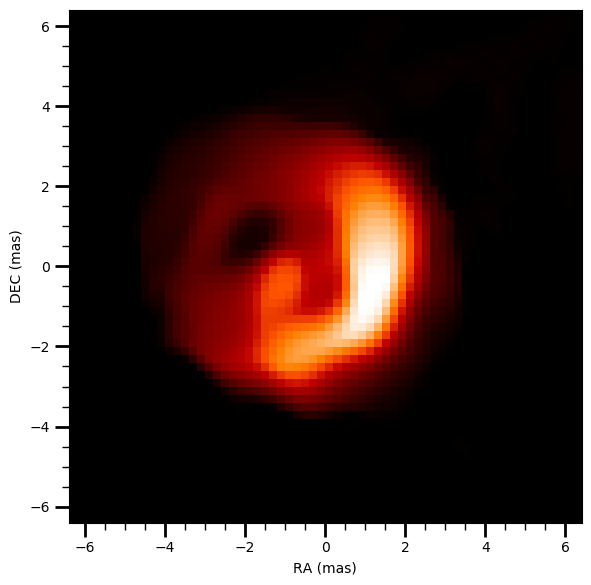

In [27]:
imdisp(x,pixscale=pixsize)